# Data analysis of birth, death and mariage of French people in 2018.

**Please note that: I will only comment on what I think is a little abnormal.**

Data source: https://www.insee.fr/fr/statistiques/4215180?sommaire=4215184

In [74]:
# import packages
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Birth data
## Data Preparation
### Loading data

In [4]:
birth_data = pd.read_csv('Nais2018.csv', sep=';')
birth_data.head()

,ANAIS,ACCOUCHR,AGEMERE,AGEPERE,AGEXACTM,AGEXACTP,AMAR,ARECC,ARECM,ARECP,...,MRECC,MRECM,MRECP,NBENF,ORIGINOM,SEXE,SITUATMR,SITUATPR,TUCOM,TUDOM
0,2018,AU,37,42,36,42,2012,0,0,0,...,0,0,0,1,1.0,1,ND,S,NaN,9
1,2018,ES,41,46,40,45,2009,0,0,0,...,0,0,0,1,1.0,1,ND,ND,NaN,9
2,2018,ES,38,45,38,44,0,2018,0,0,...,2,0,0,1,4.0,2,S,S,NaN,9
3,2018,ES,30,30,30,29,0,0,2018,0,...,0,6,0,1,1.0,2,S,S,NaN,9
4,2018,AU,29,29,28,28,0,0,2018,2018,...,0,3,3,1,3.0,1,S,NS,NaN,9


data volume

In [4]:
birth_data.shape

(758590, 32)

In [6]:
birth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758590 entries, 0 to 758589
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ANAIS     758590 non-null  int64  
 1   ACCOUCHR  757994 non-null  object 
 2   AGEMERE   758590 non-null  int64  
 3   AGEPERE   758590 non-null  int64  
 4   AGEXACTM  758590 non-null  int64  
 5   AGEXACTP  758590 non-null  int64  
 6   AMAR      758590 non-null  int64  
 7   ARECC     758590 non-null  int64  
 8   ARECM     758590 non-null  int64  
 9   ARECP     758590 non-null  int64  
 10  DEPDOM    758590 non-null  object 
 11  DEPNAIS   758590 non-null  object 
 12  DMARNAIS  301273 non-null  float64
 13  DURECEVP  552158 non-null  float64
 14  INDLNM    758590 non-null  int64  
 15  INDLNP    758590 non-null  int64  
 16  INDNATM   758590 non-null  int64  
 17  INDNATP   758590 non-null  int64  
 18  JRECC     758590 non-null  int64  
 19  JRECM     758590 non-null  int64  
 20  JREC

In [9]:
birth_data.describe()

,ANAIS,AGEMERE,AGEPERE,AGEXACTM,AGEXACTP,AMAR,ARECC,ARECM,ARECP,DMARNAIS,...,JRECM,JRECP,MNAIS,MRECC,MRECM,MRECP,NBENF,ORIGINOM,SEXE,TUDOM
count,758590.0,758590.00000,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,301273.000000,...,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,758590.000000,757994.000000,758590.000000,758590.000000
mean,2018.0,30.89362,33.760557,30.406420,33.297178,797.791507,465.642942,749.931531,521.693585,1.493323,...,5.853888,4.098292,6.605835,1.474670,2.453974,1.666907,1.033821,1.323900,1.487700,4.838933
std,0.0,5.34752,6.051734,5.347578,6.099710,984.538324,850.164055,975.172288,883.511065,0.600616,...,9.312040,8.252075,3.418599,3.151726,3.816359,3.321552,0.184170,0.753285,0.499849,2.990538
min,2018.0,17.00000,17.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2018.0,27.00000,29.000000,27.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
50%,2018.0,31.00000,33.000000,30.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000
75%,2018.0,35.00000,38.000000,34.000000,37.000000,2012.000000,0.000000,2018.000000,2017.000000,2.000000,...,10.000000,2.000000,10.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,7.000000
max,2018.0,46.00000,46.000000,46.000000,46.000000,2018.000000,2018.000000,2018.000000,2019.000000,9.000000,...,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,3.000000,5.000000,2.000000,9.000000


### Missing data

In [13]:
birth_data.isnull().mean()*100

ANAIS        0.000000
ACCOUCHR     0.078567
AGEMERE      0.000000
AGEPERE      0.000000
AGEXACTM     0.000000
AGEXACTP     0.000000
AMAR         0.000000
ARECC        0.000000
ARECM        0.000000
ARECP        0.000000
DEPDOM       0.000000
DEPNAIS      0.000000
DMARNAIS    60.285134
DURECEVP    27.212592
INDLNM       0.000000
INDLNP       0.000000
INDNATM      0.000000
INDNATP      0.000000
JRECC        0.000000
JRECM        0.000000
JRECP        0.000000
MNAIS        0.000000
MRECC        0.000000
MRECM        0.000000
MRECP        0.000000
NBENF        0.000000
ORIGINOM     0.078567
SEXE         0.000000
SITUATMR    17.023952
SITUATPR     4.889202
TUCOM        0.246246
TUDOM        0.000000
dtype: float64

* ACCOUCHR less than 0.08% missing data, from data description file, knowing these are: 'jugement déclaratif de naissance', these missing data can be filled with 'JG'.
* ORIGINOM less than 0.08% missing data, from data description file, knowing these are: 'Origine du nom non connue (Jugement déclaratif de naissance)', these missing data can be filled with '0'. 
* TUCOM less than 0.25% missing data, from data description file, knowing these are: 'indéterminé ou pays étranger', these missing data can be filled with 'N'.
* SITUATPR less than 5% missing data, from data description file, knowing these are: 'retraitée ou inactive', these missing data can be filled with 'NA'.
* SITUATMR about 17% missing data, from data description file, knowing these are: 'retraitée ou inactive', these missing data can be filled with 'NA'. 
* DURECEVP over 27% missing data, from data description file, knowing these are: 'enfant né hors mariage, premier né ou jugement déclaratif de naissance', these missing data can be filled with '-1'. 
* DMARNAIS over 60% missing data, from data description file, knowing these are: 'né hors mariage', these missing data can be filled with '0'. 

In [5]:
values = {"ACCOUCHR": 'JG', "ORIGINOM": 0, "TUCOM": 'N', "SITUATPR": 'NA', "SITUATMR": 'NA', "DURECEVP": -1, "DMARNAIS": 0}
birth_data.fillna(value=values, inplace=True)

In [6]:
birth_data.isnull().sum().sum()

0

* No missing data now.

### Duplicated data
After discovering our dataset, we find there are children born as twins or more, details in the column 'NBENF', means 'number of children born', so these duplicated should remain.

In [87]:
birth_data.duplicated().sum()

4828

#### data entry errors
I find for 'DEPDOM' and 'DEPNAIS' these two columns, there are two mixed data types: string and number.\
And for 'DEPNAIS', there are '01' and '1', '02' and '2', etc., this problem should also be solved.\
These create redundancy.

In [7]:
# union all types to string type
birth_data.DEPDOM = birth_data.DEPDOM.map(lambda x: str(x))
birth_data.DEPNAIS = birth_data.DEPNAIS.map(lambda x: str(x))

In [8]:
# define a function to transform 1,2,3... to 01,02,03....
def trans(string):
    if len(string) == 1:
        string = '0' + string
    else:
        string = string
    return string

In [9]:
birth_data.DEPDOM = birth_data.DEPDOM.map(lambda x: trans(x))
birth_data.DEPNAIS = birth_data.DEPNAIS.map(lambda x: trans(x))

In [29]:
print('DEPDOM distinct values number: ',len(birth_data.DEPDOM.unique()), '; DEPNAIS distinct values number: ',len(birth_data.DEPNAIS.unique()))

DEPDOM distinct values number:  105 ; DEPNAIS distinct values number:  101


## Exploratory Analysis

<Figure size 432x288 with 0 Axes>

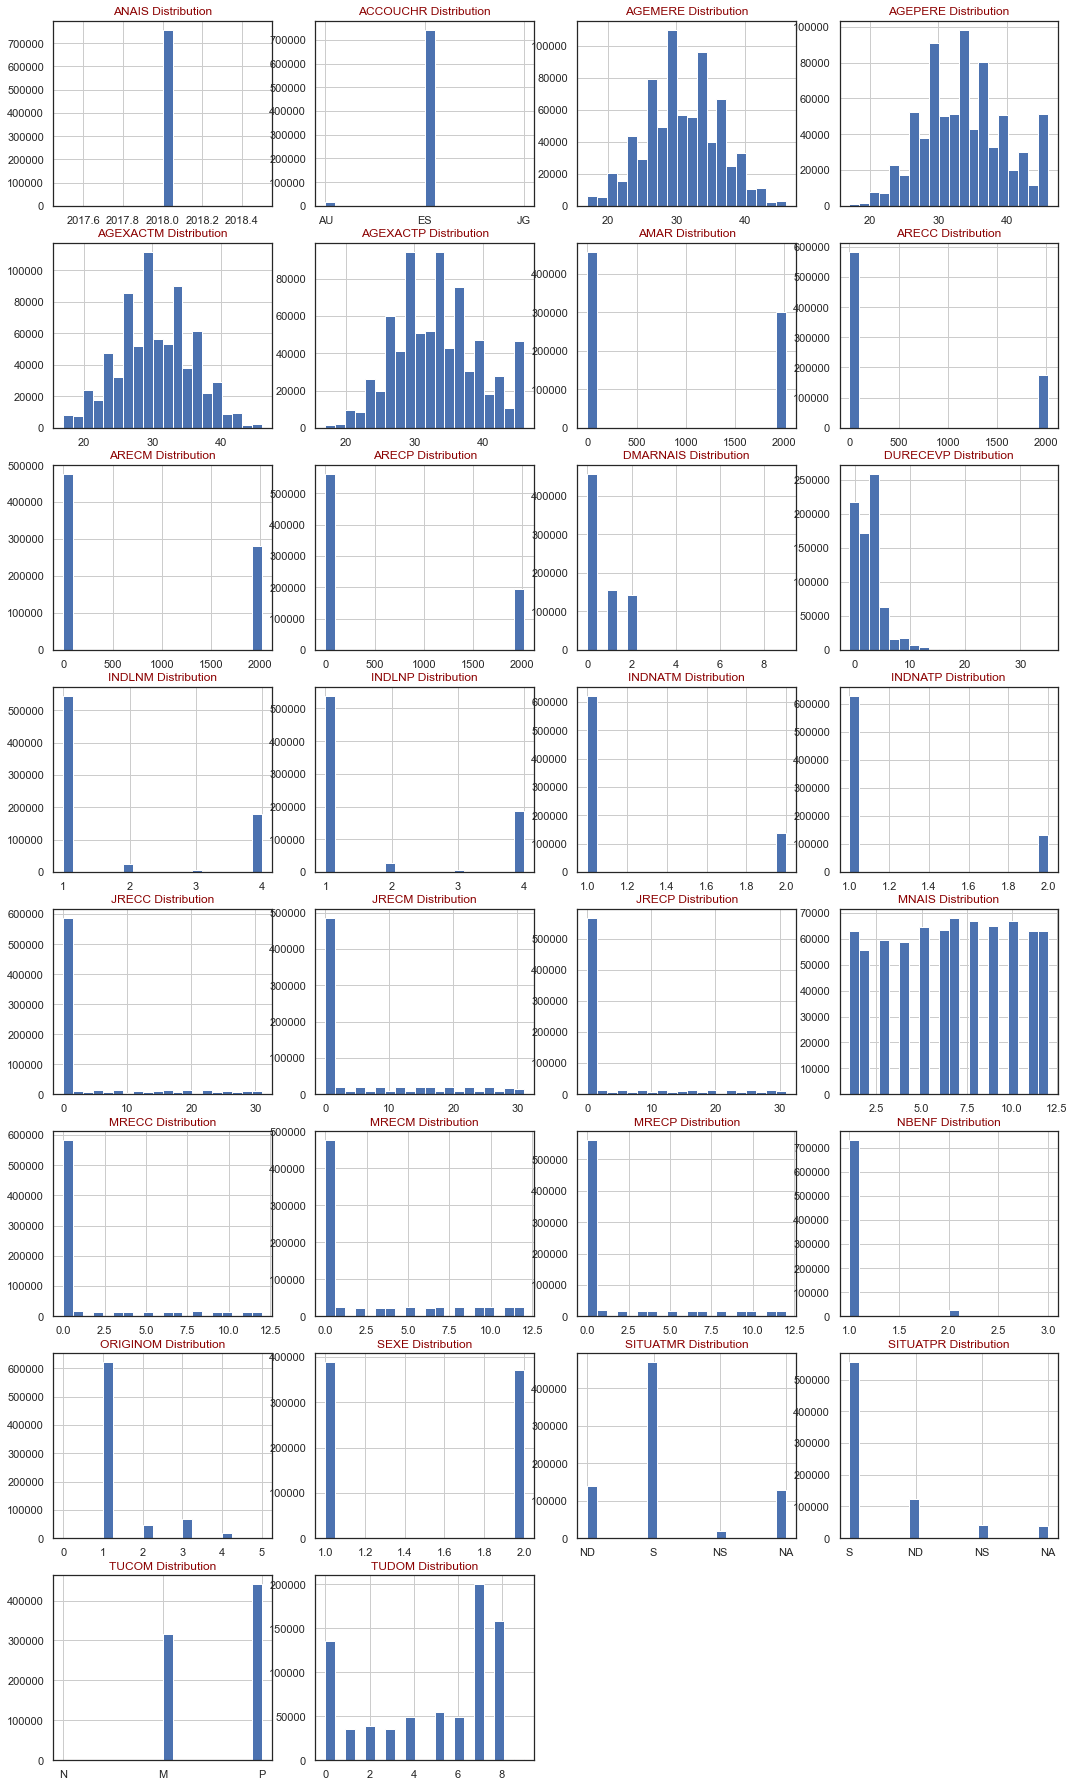

In [32]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(18,32))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+" Distribution", color='DarkRed')

plt.tight_layout()
col = birth_data.drop(columns=['DEPDOM','DEPNAIS']).columns
draw_histograms(birth_data, col, 8, 4)

### Months of birth
Which month has more birth?

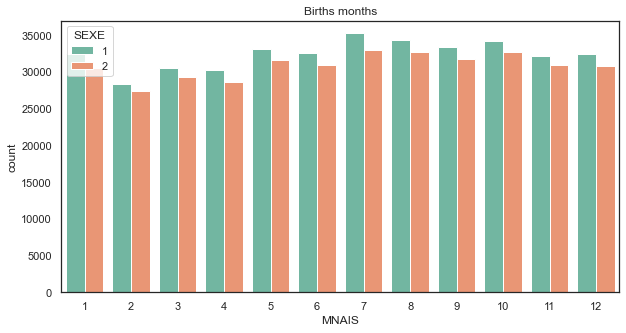

In [255]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="MNAIS", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Births months');

#### Season of birth
Which season has more birth?

In [76]:
birth_data['SNAIS'] = birth_data.MNAIS.map(lambda x: ceil(x/3))
birth_data.head()

,ANAIS,ACCOUCHR,AGEMERE,AGEPERE,AGEXACTM,AGEXACTP,AMAR,ARECC,ARECM,ARECP,...,MRECM,MRECP,NBENF,ORIGINOM,SEXE,SITUATMR,SITUATPR,TUCOM,TUDOM,SNAIS
0,2018,AU,37,42,36,42,2012,0,0,0,...,0,0,1,1.0,1,ND,S,N,9,3
1,2018,ES,41,46,40,45,2009,0,0,0,...,0,0,1,1.0,1,ND,ND,N,9,1
2,2018,ES,38,45,38,44,0,2018,0,0,...,0,0,1,4.0,2,S,S,N,9,2
3,2018,ES,30,30,30,29,0,0,2018,0,...,6,0,1,1.0,2,S,S,N,9,2
4,2018,AU,29,29,28,28,0,0,2018,2018,...,3,3,1,3.0,1,S,NS,N,9,1


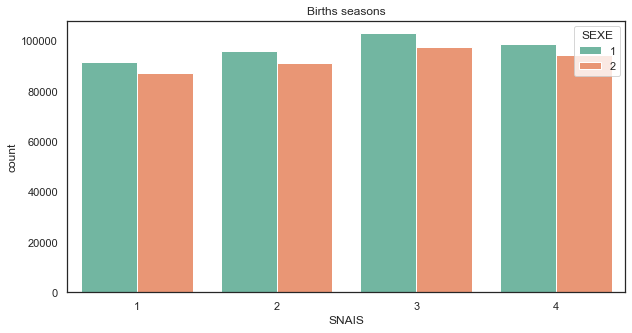

In [278]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="SNAIS", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Births seasons');

* More births in the second half of the year.

### Department of births.

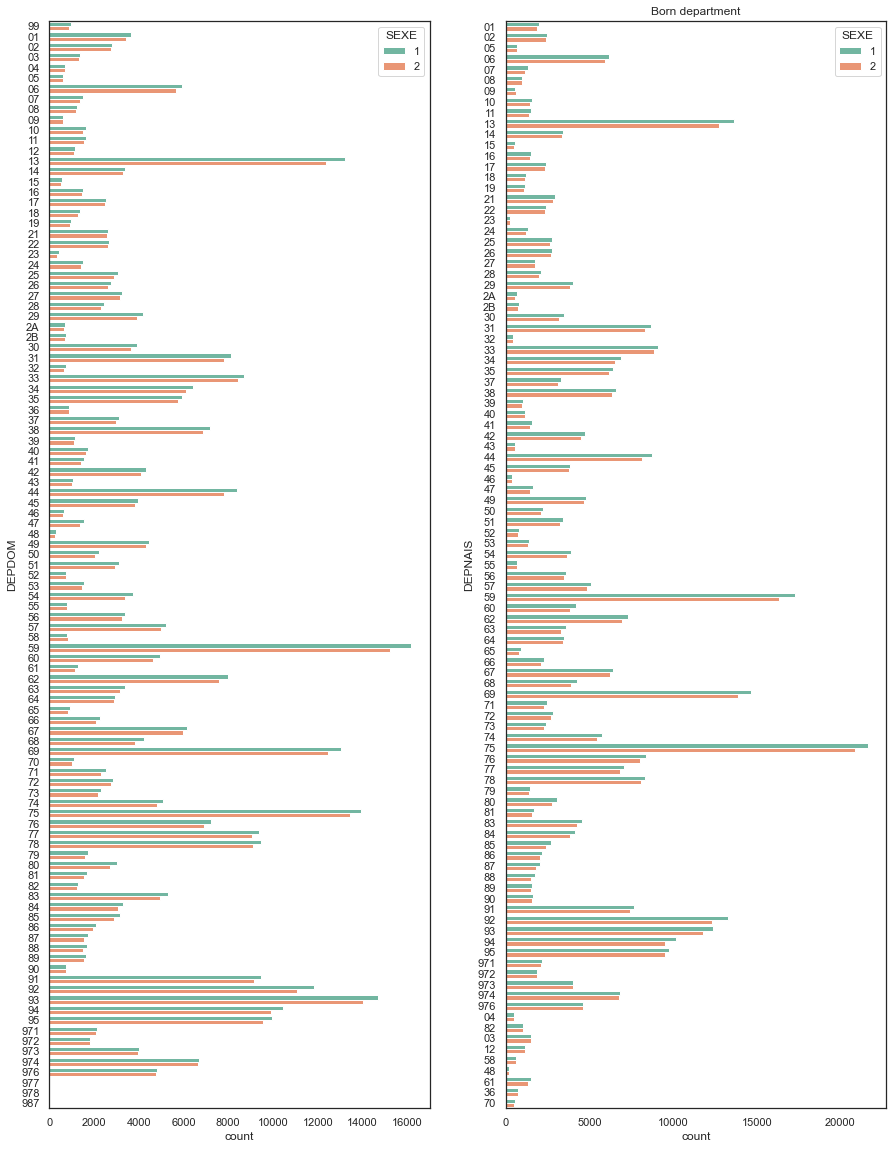

In [205]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 20))
sns.countplot(y="DEPDOM", data=birth_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(y="DEPNAIS", data=birth_data, hue='SEXE', palette='Set2', ax=axes[1])
plt.title("Born department");

* In France, there are more boys than girls born.
* For departments with a large number of births, this problem is more obvious.
* For departments with a small number of births, boys and girls births is more balanced.
* DEPDOM (58,977,09,55), DEPNAI(58,09,03,43) have more girls born.

In [13]:
print(birth_data.groupby('DEPDOM').SEXE.mean().sort_values(ascending=False),'\n',
birth_data.groupby('DEPNAIS').SEXE.mean().sort_values(ascending=False))

DEPDOM
58     1.522028
977    1.516129
09     1.508104
55     1.504920
976    1.499166
         ...   
61     1.472586
23     1.467581
99     1.467345
978    1.434783
987    1.400000
Name: SEXE, Length: 105, dtype: float64 
 DEPNAIS
58    1.512097
09    1.511824
03    1.505316
43    1.500444
82    1.499526
        ...   
07    1.470188
65    1.467563
88    1.467238
61    1.466643
70    1.456905
Name: SEXE, Length: 101, dtype: float64


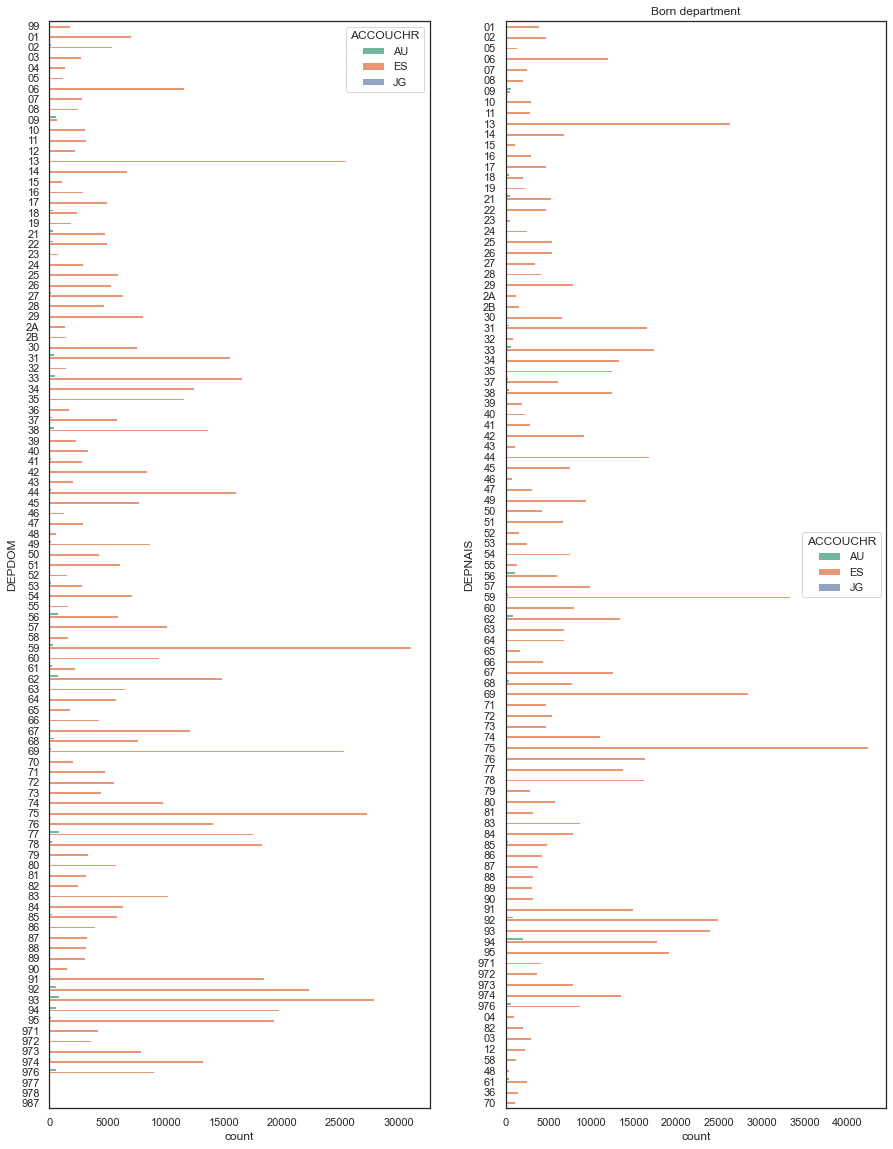

In [206]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 20))
sns.countplot(y="DEPDOM", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[0])
sns.countplot(y="DEPNAIS", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[1])
plt.title("Born department");

* 09 - Ariège has half of births not in a specialized institution

#### Section of mother's commune births.

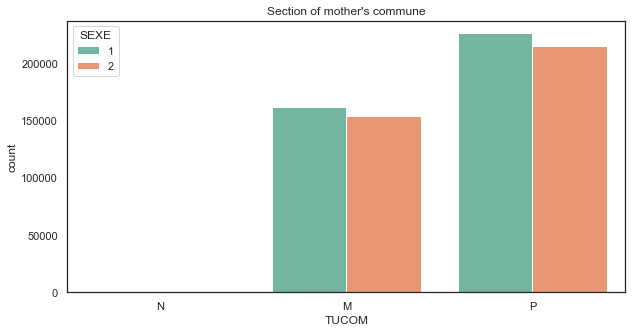

In [253]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUCOM", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Section of mother\'s commune');

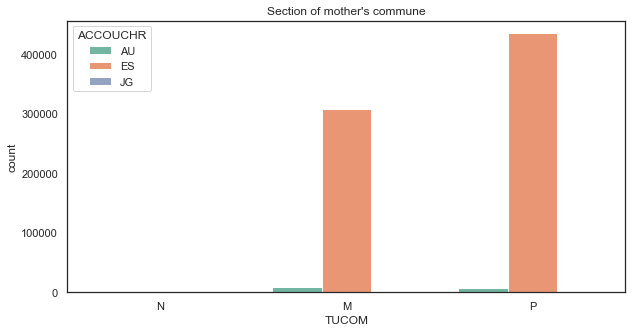

In [252]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUCOM", data=birth_data, hue='ACCOUCHR', palette='Set2')
plt.title('Section of mother\'s commune');

#### Section of mother's urban unit births.

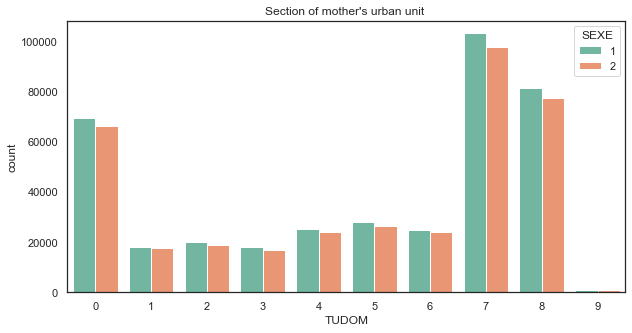

In [279]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUDOM", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Section of mother\'s urban unit ');

* Urban (7) with 0.2 - 2 million inhabitants has the most births.
* It seems that urbans (1 - 6) with 2k to 200k inhabitants have no big differences in birth numbers.

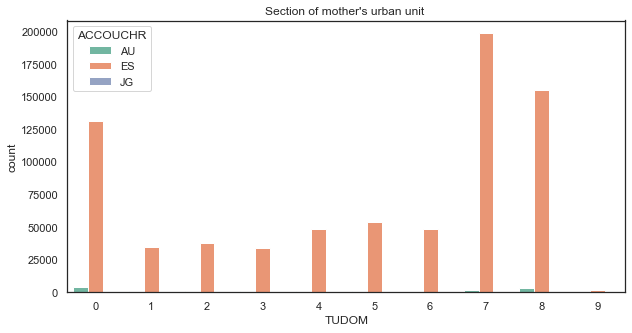

In [250]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUDOM", data=birth_data, hue='ACCOUCHR', palette='Set2')
plt.title('Section of mother\'s urban unit ');

### Parents' professional situation

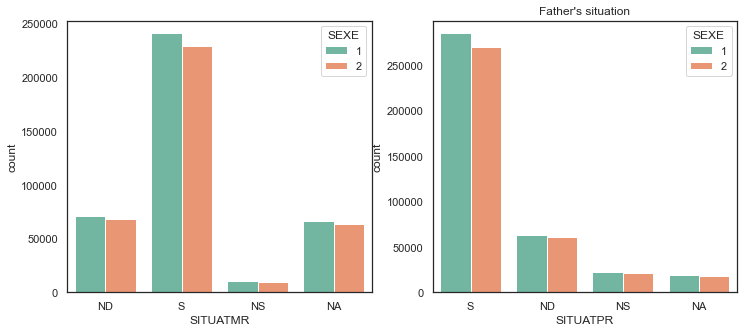

In [280]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="SITUATMR", data=birth_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(x="SITUATPR", data=birth_data, hue='SEXE', palette='Set2', ax=axes[1])
plt.title("Father's situation");

* Those with incomes are more willing to have children.
* It seems father's situation influents more, I'll verify it.

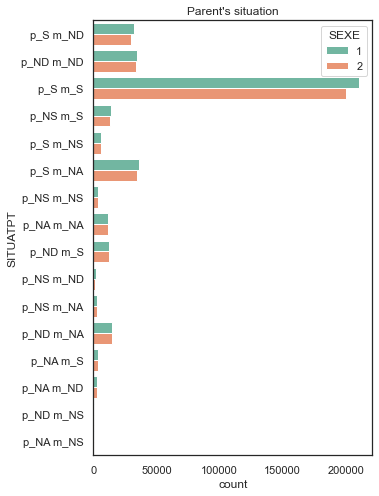

In [209]:
#birth_data['SITUATPT'] = 'p_' + birth_data["SITUATPR"] + ' m_' + birth_data["SITUATMR"]
plt.figure(figsize=(5, 8))
sns.countplot(y="SITUATPT", data=birth_data, hue='SEXE', palette='Set2')
plt.title("Parent's situation");

* It looks like my guess is correct: father's professional situation influents much, families are more likely to have children when fathers have a paid job. The most willing to have children is when both parents have paid jobs.

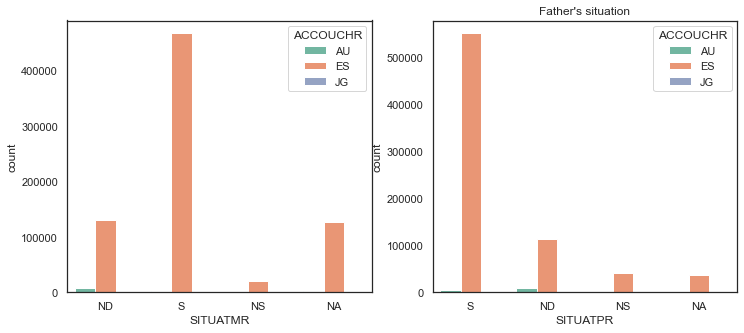

In [210]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="SITUATMR", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[0])
sns.countplot(x="SITUATPR", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[1])
plt.title("Father's situation");

* There are some children are not born in a specialized institution, while parents' pro situation is unknown.

### Parents' nationality 

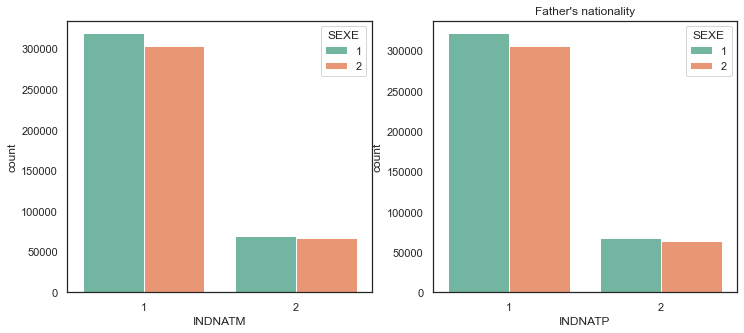

In [183]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="INDNATM", data=birth_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(x="INDNATP", data=birth_data, hue='SEXE', palette='Set2', ax=axes[1])
plt.title("Father's nationality");

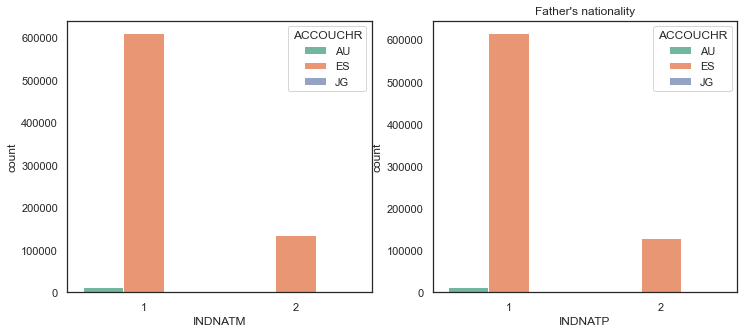

In [182]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="INDNATM", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[0])
sns.countplot(x="INDNATP", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[1])
plt.title("Father's nationality");

### Parents' birthplace

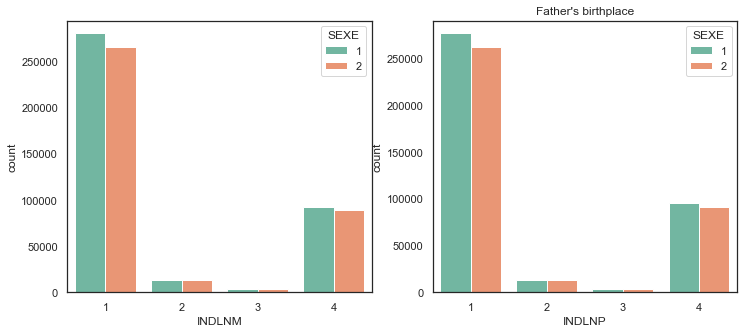

In [211]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="INDLNM", data=birth_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(x="INDLNP", data=birth_data, hue='SEXE', palette='Set2', ax=axes[1])
plt.title("Father's birthplace");

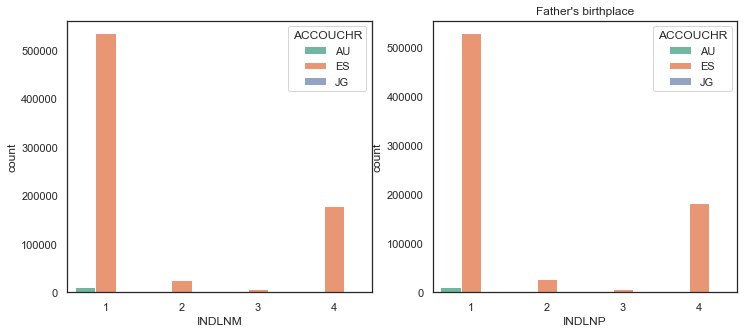

In [180]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x="INDLNM", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[0])
sns.countplot(x="INDLNP", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[1])
plt.title("Father's birthplace");

* We can find that the proportion of foreigners (place of birth) having children is quite high. Will France become a country of immigrants?

### Parents' age.

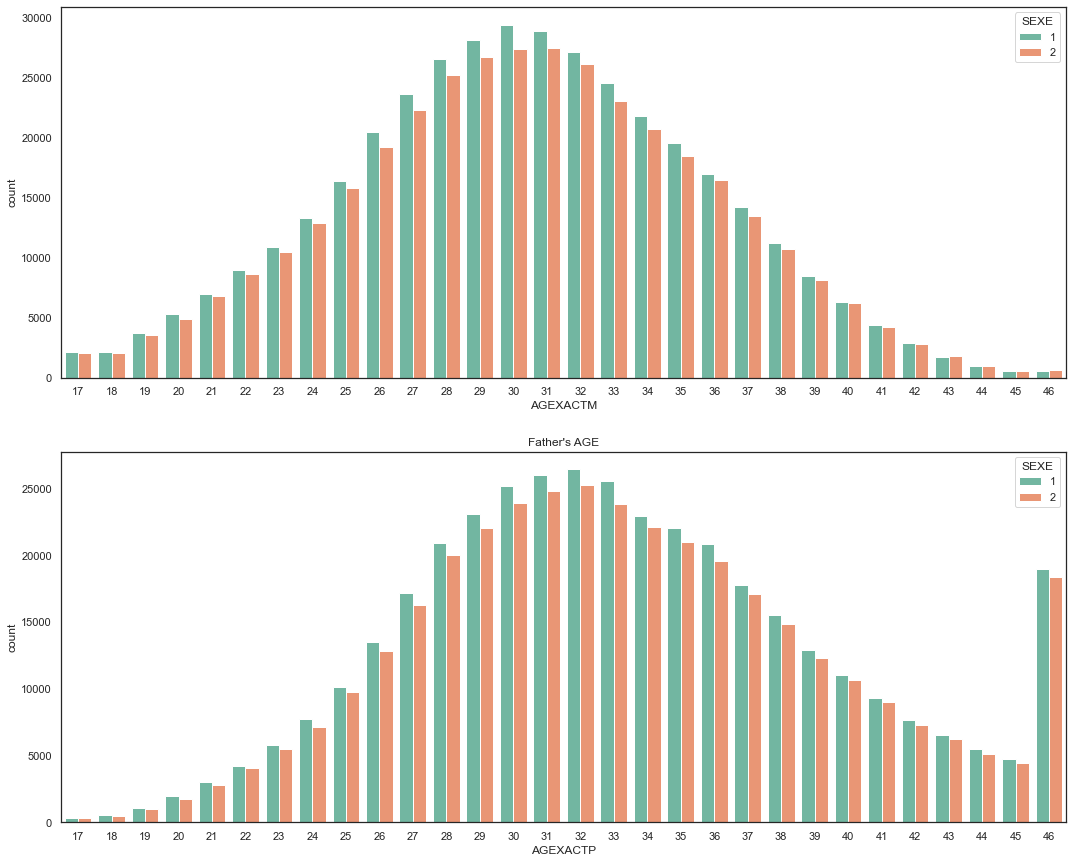

In [212]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
sns.countplot(x="AGEXACTM", data=birth_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(x="AGEXACTP", data=birth_data, hue='SEXE', palette='Set2', ax=axes[1])
plt.title("Father's AGE");

* There's a peak around age of 31, men's average reproductive age is later, and have aother peak at age of 46 for men.

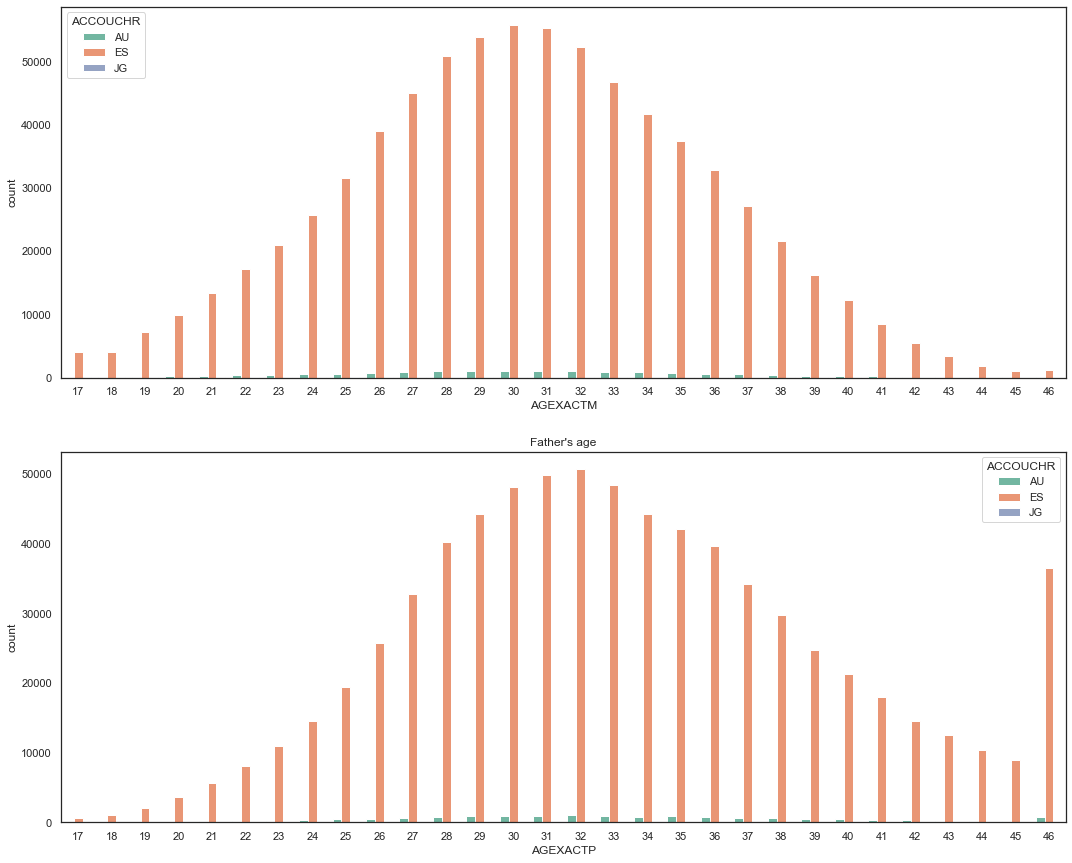

In [249]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
sns.countplot(x="AGEXACTM", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[0])
sns.countplot(x="AGEXACTP", data=birth_data, hue='ACCOUCHR', palette='Set2', ax=axes[1])
plt.title("Father's age");

### Marriage year of the child's parents

Define a new feature of 'married how many years', I will divide the number of years by 5 years.\
The bigest number means child born out of wedlock or declaratory judgment of birth.

In [170]:
birth_data['NAMAR'] = birth_data.AMAR.map(lambda x: ceil((2018-x)/5))

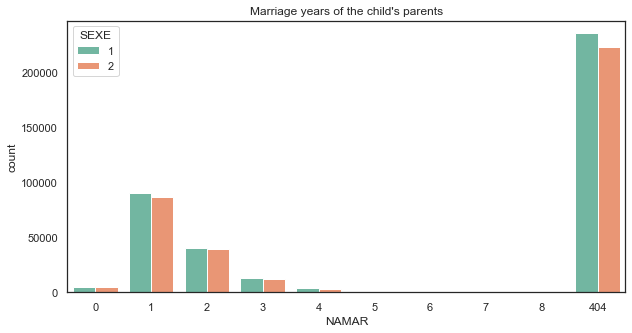

In [281]:
plt.figure(figsize=(10, 5))
sns.countplot(x="NAMAR", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Marriage years of the child\'s parents');

* People usually have children within five years of marriage.
* There are many children born out of wedlock or declaratory judgment of birth in France.
Verifying this with another feature 'DMARNAIS': comparison of the anniversary dates of the parents' marriage and the child's birth date

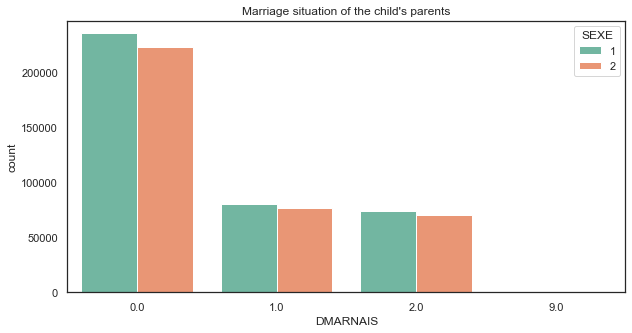

In [282]:
plt.figure(figsize=(10, 5))
sns.countplot(x="DMARNAIS", data=birth_data, hue='SEXE', palette='Set2')
plt.title('Marriage situation of the child\'s parents');

* The bigest one (blue bar): child born out of wedlock.

# Death data.

In [202]:
death_data = pd.read_csv('deces2018.csv', sep=';')
death_data.head()

,ADEC,MDEC,DEPDEC,LIEUDECR,SEXE,ANAIS,DEPNAIS,ACTIV,INDNAT,DEPDOM,TUDOM,TUCOM,ETAMAT
0,2018,3,01,AUT,2,1970,99,3,2,99,9,NaN,1
1,2018,6,01,AUT,1,1944,99,1,2,99,9,NaN,2
2,2018,5,01,LOG,2,1955,99,1,2,99,9,NaN,4
3,2018,7,01,AUT,1,1956,99,3,2,99,9,NaN,4
4,2018,5,01,HMR,2,1930,99,1,1,99,9,NaN,2


In [203]:
death_data.shape

(609648, 13)

In [215]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609648 entries, 0 to 609647
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ADEC      609648 non-null  int64 
 1   MDEC      609648 non-null  int64 
 2   DEPDEC    609648 non-null  object
 3   LIEUDECR  609648 non-null  object
 4   SEXE      609648 non-null  int64 
 5   ANAIS     609648 non-null  int64 
 6   DEPNAIS   609648 non-null  object
 7   ACTIV     609648 non-null  int64 
 8   INDNAT    609648 non-null  int64 
 9   DEPDOM    609648 non-null  object
 10  TUDOM     609648 non-null  int64 
 11  TUCOM     607597 non-null  object
 12  ETAMAT    609648 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 60.5+ MB


In [216]:
death_data.describe()

,ADEC,MDEC,SEXE,ANAIS,ACTIV,INDNAT,TUDOM,ETAMAT
count,609648.0,609648.000000,609648.000000,609648.000000,609648.000000,609648.000000,609648.000000,609648.000000
mean,2018.0,6.343211,1.501873,1938.750233,1.211755,1.053823,3.956913,2.357296
std,0.0,3.542436,0.499997,15.893137,0.567163,0.225668,2.985002,0.867435
min,2018.0,1.000000,1.000000,1904.000000,1.000000,1.000000,0.000000,1.000000
25%,2018.0,3.000000,1.000000,1928.000000,1.000000,1.000000,1.000000,2.000000
50%,2018.0,6.000000,2.000000,1934.000000,1.000000,1.000000,4.000000,2.000000
75%,2018.0,10.000000,2.000000,1947.000000,1.000000,1.000000,7.000000,3.000000
max,2018.0,12.000000,2.000000,2018.000000,3.000000,2.000000,9.000000,4.000000


### Missing data

In [219]:
death_data.isnull().mean()*100

ADEC        0.000000
MDEC        0.000000
DEPDEC      0.000000
LIEUDECR    0.000000
SEXE        0.000000
ANAIS       0.000000
DEPNAIS     0.000000
ACTIV       0.000000
INDNAT      0.000000
DEPDOM      0.000000
TUDOM       0.000000
TUCOM       0.336424
ETAMAT      0.000000
dtype: float64

* TUCOM less than 0.35% missing data, from data description file, knowing these are: 'indéterminé ou pays étranger', these missing data can be filled with 'N'.

In [221]:
death_data.TUCOM.fillna('N', inplace=True)

In [223]:
death_data.isnull().sum().sum()

0

* No missing data now.

### Duplicated data


In [225]:
death_data.duplicated().sum()

29569

#### data entry errors
I find for 'DEPDOM', and 'DEPNAIS' these two columns, there are two mixed data types: string and number.\
And for 'DEPNAIS', there are '01' and '1', '02' and '2', etc., this problem should also be solved.\
These create redundancy.

In [229]:
# union all types to string type
death_data.DEPDOM = death_data.DEPDOM.map(str)
death_data.DEPNAIS = death_data.DEPNAIS.map(str)

In [231]:
# define a function to transform 1,2,3... to 01,02,03....
def trans(string):
    if len(string) == 1:
        string = '0' + string
    else:
        string = string
    return string

In [232]:
death_data.DEPDOM = death_data.DEPDOM.map(trans)
death_data.DEPNAIS = death_data.DEPNAIS.map(trans)

In [235]:
print('DEPDEC distinct values number: ',len(death_data.DEPDEC.unique()), '\n DEPDOM distinct values number: ',len(death_data.DEPDOM.unique()), '\n DEPNAIS distinct values number: ',len(death_data.DEPNAIS.unique()))

DEPDEC distinct values number:  101 
 DEPDOM distinct values number:  108 
 DEPNAIS distinct values number:  108


## Exploratory Analysis

<Figure size 432x288 with 0 Axes>

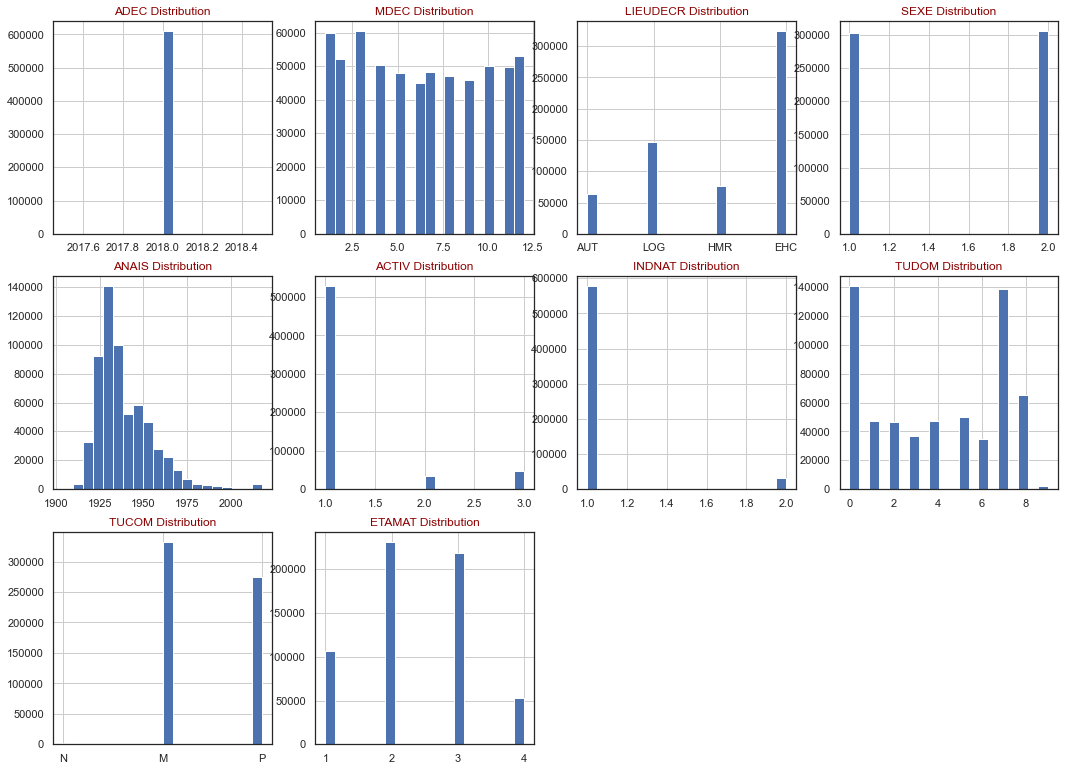

In [239]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(18,18))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+" Distribution", color='DarkRed')

plt.tight_layout()
col = death_data.drop(columns=['DEPDEC','DEPDOM','DEPNAIS']).columns
draw_histograms(death_data, col, 4, 4)

### Months of death
Which month has more death?

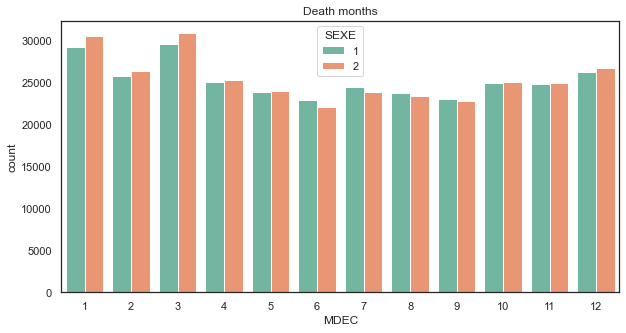

In [244]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="MDEC", data=death_data, hue='SEXE', palette='Set2')
plt.title('Death months');

#### Season of death
Which season has more death?

In [241]:
death_data['SDEC'] = death_data.MDEC.map(lambda x: ceil(x/3))
death_data.head()

,ADEC,MDEC,DEPDEC,LIEUDECR,SEXE,ANAIS,DEPNAIS,ACTIV,INDNAT,DEPDOM,TUDOM,TUCOM,ETAMAT,SDEC
0,2018,3,01,AUT,2,1970,99,3,2,99,9,N,1,1
1,2018,6,01,AUT,1,1944,99,1,2,99,9,N,2,2
2,2018,5,01,LOG,2,1955,99,1,2,99,9,N,4,2
3,2018,7,01,AUT,1,1956,99,3,2,99,9,N,4,3
4,2018,5,01,HMR,2,1930,99,1,1,99,9,N,2,2


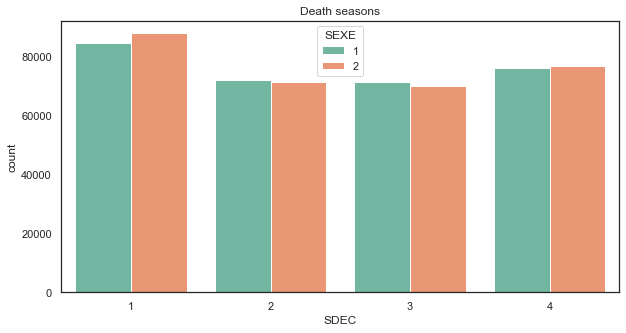

In [283]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="SDEC", data=death_data, hue='SEXE', palette='Set2')
plt.title('Death seasons');

* More deaths in the first and forth season.

### Department of deaths.

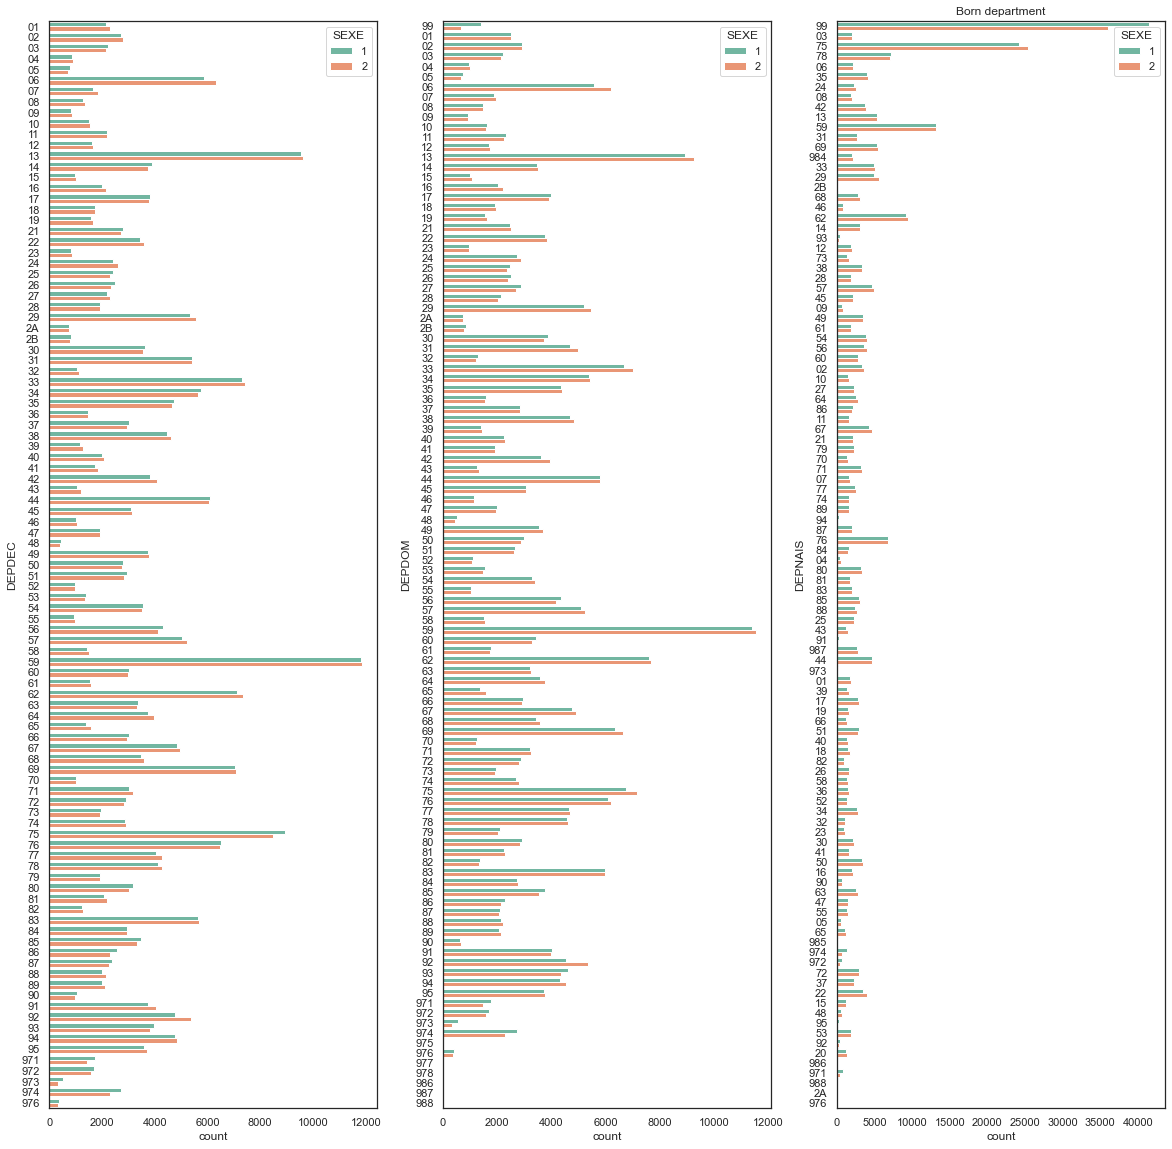

In [284]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
sns.countplot(y="DEPDEC", data=death_data, hue='SEXE', palette='Set2', ax=axes[0])
sns.countplot(y="DEPDOM", data=death_data, hue='SEXE', palette='Set2', ax=axes[1])
sns.countplot(y="DEPNAIS", data=death_data, hue='SEXE', palette='Set2', ax=axes[2])
plt.title("Born department");

* Foreign-born people die a lot, and unlike other regions, there are clearly more men than women. The second is Paris-born people, where the number of deaths is higher.
* Department with more deaths are: 59, 13, 75 (more men than women), 62, 69, 33, etc..
* More deaths at home in department: 59, 13, 62, 75 (more men than women), etc..
* All these may come from the huge total inhabitant numbers. They are not mortality rates.
* There are many possible causes, but it is worth investigating regional deaths in depth.

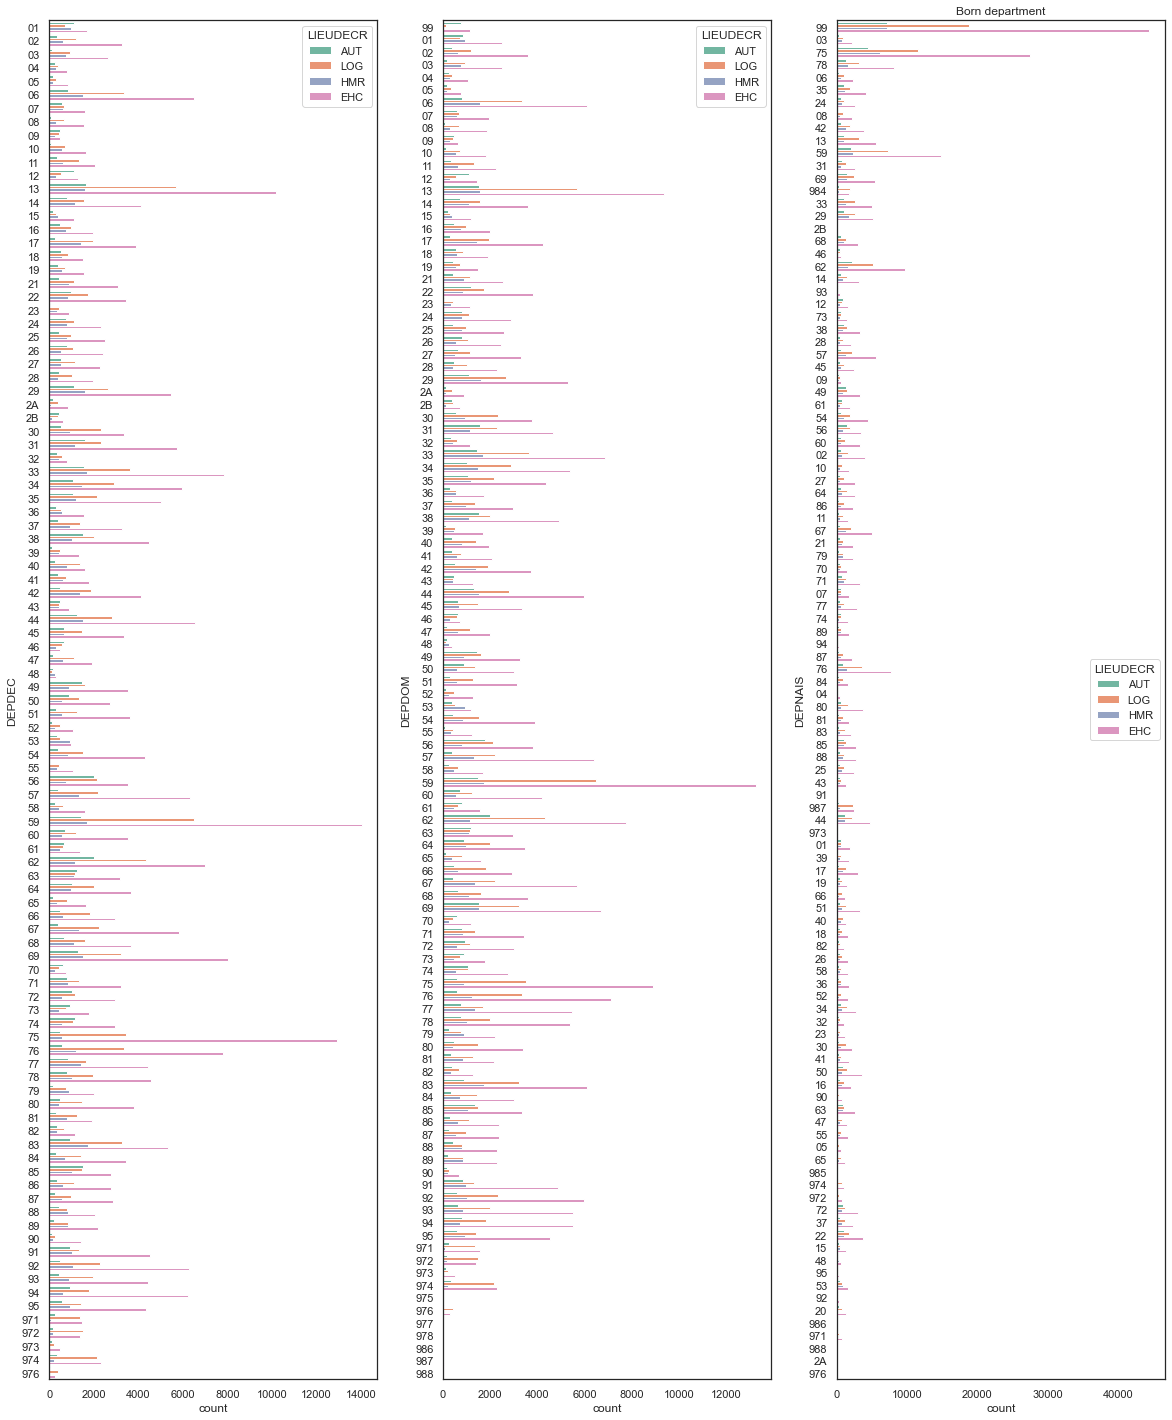

In [285]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 25))
sns.countplot(y="DEPDEC", data=death_data, hue='LIEUDECR', palette='Set2', ax=axes[0])
sns.countplot(y="DEPDOM", data=death_data, hue='LIEUDECR', palette='Set2', ax=axes[1])
sns.countplot(y="DEPNAIS", data=death_data, hue='LIEUDECR', palette='Set2', ax=axes[2])
plt.title("Born department");

* In Paris, more people die in hospitals or private clinics.

#### Section of commune.

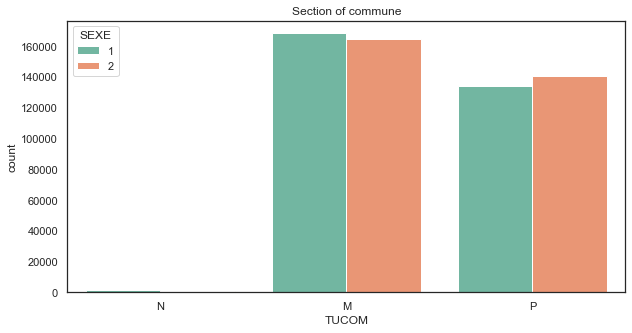

In [286]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUCOM", data=death_data, hue='SEXE', palette='Set2')
plt.title('Section of commune');

* Commune with fewer than 10k inhabitants had more male deaths.
* And commune with fewer than 10k inhabitants had more deaths, maybe because France has more commune with less inhabitants.

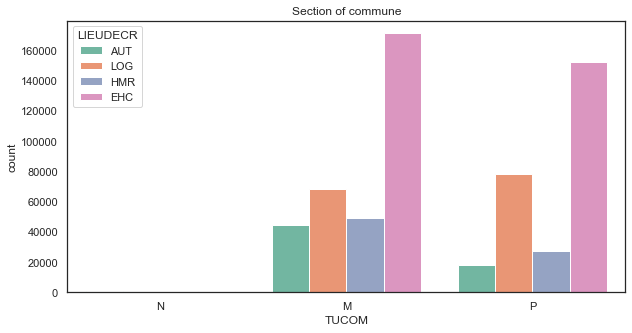

In [291]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUCOM", data=death_data, hue='LIEUDECR', palette='Set2')
plt.title('Section of commune');

* Commune with more than 10k inhabitants has more dead at home.
* Commune with less than 10k inhabitants has more dead at nursing home, or other places.

#### Section of urban unit.

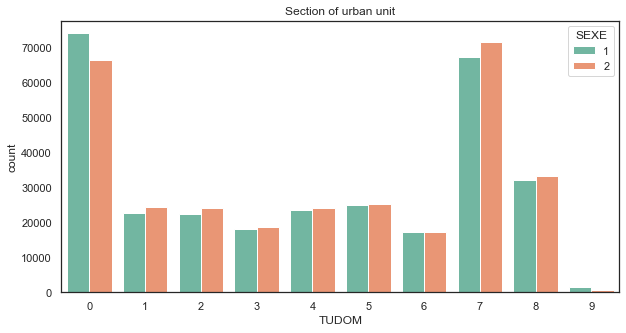

In [288]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUDOM", data=death_data, hue='SEXE', palette='Set2')
plt.title('Section of urban unit');

* Rural commune has a higher number of death, and more men death than women death.
* It seems no big difference between urbans 1 - 6, with inhabitants numbers vary from 2k to 200k.

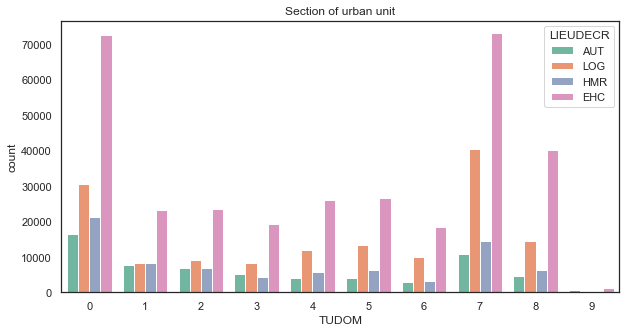

In [290]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="TUDOM", data=death_data, hue='LIEUDECR', palette='Set2')
plt.title('Section of urban unit');

### Nationality 

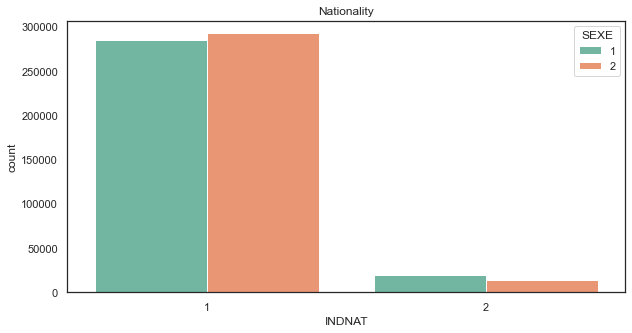

In [292]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="INDNAT", data=death_data, hue='SEXE', palette='Set2')
plt.title('Nationality');

* More men than women among foreign deceased

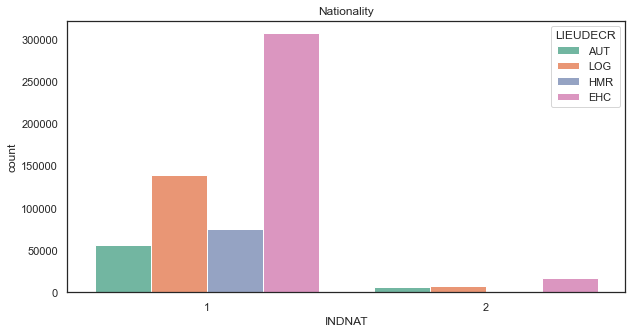

In [270]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="INDNAT", data=death_data, hue='LIEUDECR', palette='Set2')
plt.title('Nationality');

### Activity code of the deceased

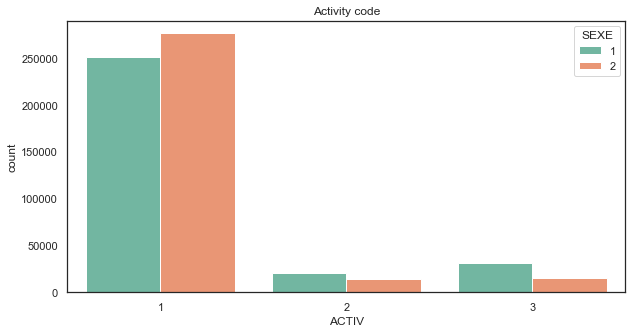

In [293]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="ACTIV", data=death_data, hue='SEXE', palette='Set2')
plt.title('Activity code');

* Among those with occupational activities (activity code: 3), almost twice as many men died as women.

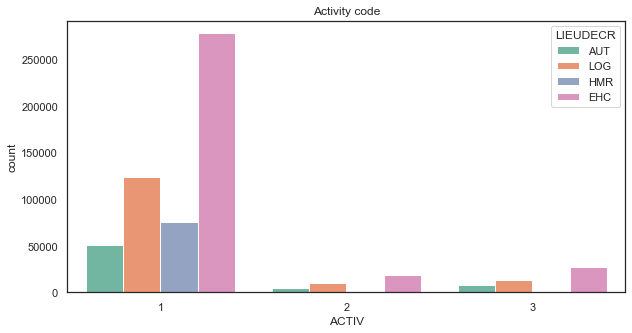

In [294]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="ACTIV", data=death_data, hue='LIEUDECR', palette='Set2')
plt.title('Activity code');

* Code 2 and code 3 people should be young, because they don't die in nursing homes.

### Age of deceased

Define a new feature of age, I will divide the ages by 10 years. \
For example, 50 means the age is between 40-50.

In [273]:
death_data['AGE'] = death_data.ANAIS.map(lambda x: 10*ceil((2018-x)/10))

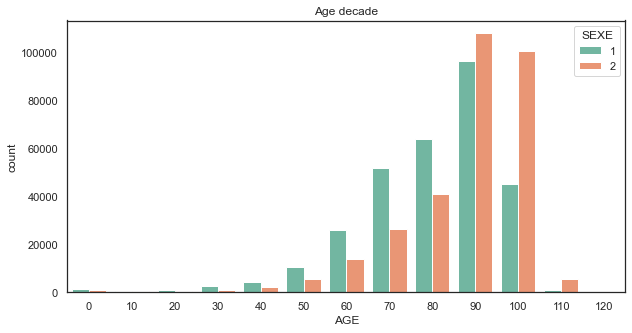

In [295]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="AGE", data=death_data, hue='SEXE', palette='Set2')
plt.title('Age decade');

* Among younger people, men die at a higher rate than women, suggesting that women live longer. This makes sense, better explains why more women die than men. Because normally, the death rate is greatest at old age, and more women live to old age.

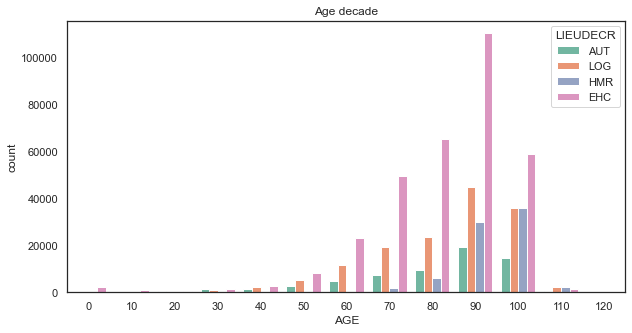

In [275]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="AGE", data=death_data, hue='LIEUDECR', palette='Set2')
plt.title('Age decade');

### Did France have more births than deaths in 2018?

In [296]:
birth_data.shape[0]/death_data.shape[0]

1.2443081909560927

* Yes!

### I want to discover more the birth/death in different department.

In [302]:
birth_dep_df = pd.DataFrame(birth_data.groupby('DEPNAIS').ANAIS.count())
death_dep_df = pd.DataFrame(death_data.groupby('DEPDEC').ADEC.count())
dep_birth_death_df = pd.concat([birth_dep_df,death_dep_df], axis=1)
dep_birth_death_df.head()

,ANAIS,ADEC
01,3900,4471
02,4927,5505
03,3010,4426
04,1030,1791
05,1307,1490


In [306]:
dep_birth_death_df.isnull().sum().sum()

0

In [346]:
dep_birth_death_df.sum()

ANAIS    758590
ADEC     609648
dtype: int64

* No missing data here.

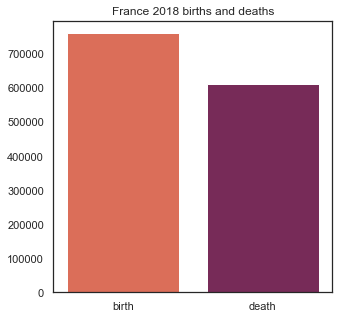

In [377]:
plt.figure(figsize=(5,5))
sns.barplot(x=[0,1], y=dep_birth_death_df.sum(), palette="rocket_r")
plt.xticks([0,1], ['birth','death'])
plt.title('France 2018 births and deaths');

### Department birth to death ratio

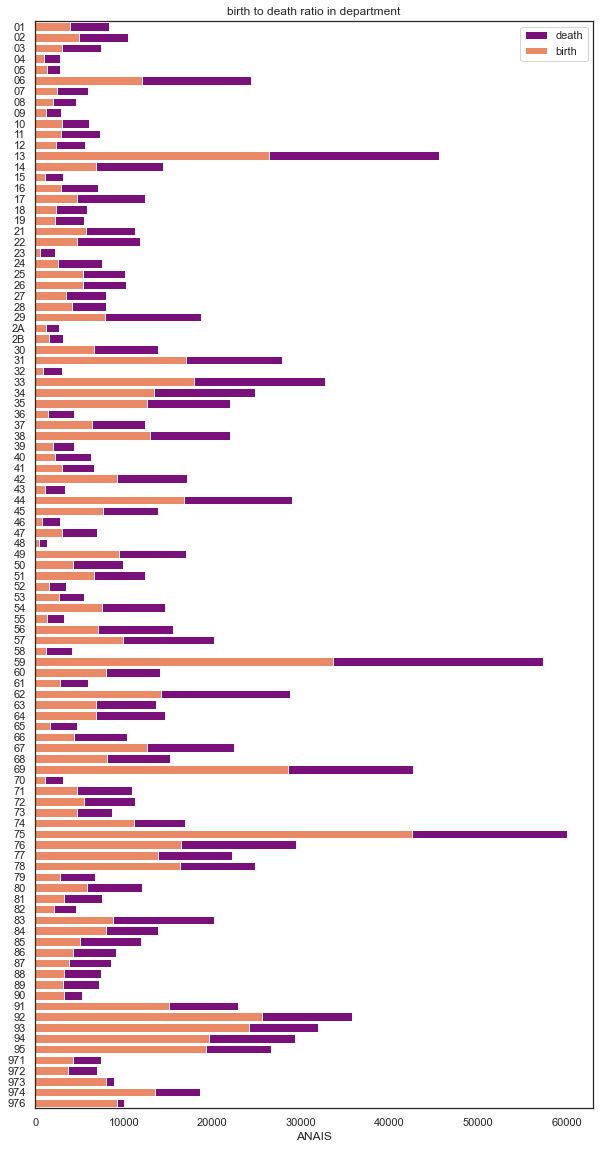

In [372]:
plt.figure(figsize=(10,20))

sns.barplot(y=dep_birth_death_df.index, x=dep_birth_death_df.ANAIS+dep_birth_death_df.ADEC, color='#8B008B', label='death')
sns.barplot(y=dep_birth_death_df.index, x=dep_birth_death_df.ANAIS, color='#FF7F50', label='birth')
plt.title('birth to death ratio in department')
plt.legend()
plt.show()

* It is not difficult to find that in departments that with large population, the number of births is higher than the number of deaths. The problem of population aging in small towns.